In [1]:
%matplotlib inline
import numpy as np
import glob
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import random
import os
from sklearn.preprocessing import label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
import pickle

In [2]:
from sklearn import preprocessing
scale = StandardScaler()
min_max_scaler = preprocessing.MinMaxScaler()
def scaleColumns(df, cols_to_scale):
    for col in cols_to_scale:
        df[col] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(df[col])),columns=[col])
    return df

In [3]:
signal = pd.read_csv('process_data/signal_pred.csv',sep=',')
background = pd.read_csv('process_data/background_pred.csv',sep=',')

In [4]:
signal['signal'] = 1
background['signal'] = 0

In [5]:
analysis = pd.concat([signal, background], ignore_index=True)

In [6]:
analysis.head()

,Unnamed: 0,pt_j1,m_j1,eta_j1,phi_j1,E_j1,pt_j2,m_j2,eta_j2,phi_j2,...,deltaR2_sj23,deltaR2_sj24,deltaR2_sj34,n_subjets1,n_subjets2,event_idx,img_name,P_BG,P_SIG,signal
0,0,1210.415787,129.499352,-0.744836,-2.883347,1567.345300,1091.785816,155.362262,1.060534,0.264977,...,0.000000,0.000000,0.00000,1,1,4,4.png,0.378957,0.621043,1
1,1,1787.625573,99.168898,-0.934612,1.185407,2628.753873,1717.649940,515.054419,-1.044915,-1.955165,...,2.512072,2.512072,0.00000,1,2,8,8.png,0.027786,0.972214,1
2,2,1368.776255,104.840764,-1.136360,1.353935,2354.162865,1283.549433,452.024576,0.053019,-1.781479,...,1.015464,1.926491,2.05649,1,3,19,19.png,0.288431,0.711569,1
3,3,1659.355146,110.390275,-0.348487,2.475010,1764.594154,1634.435917,487.949083,0.102619,-0.649581,...,0.452664,0.452664,0.00000,1,2,24,24.png,0.093520,0.906480,1
4,4,1827.270115,551.510487,0.208524,-0.979991,1946.889764,1799.302155,108.942106,-0.452693,2.177153,...,0.000000,0.000000,0.00000,2,1,33,33.png,0.027147,0.972853,1


In [7]:
analysis.drop(['event_idx','img_name','Unnamed: 0'], axis=1, inplace=True)

In [8]:
#analysis = analysis[analysis.n_subjets2 != 0]

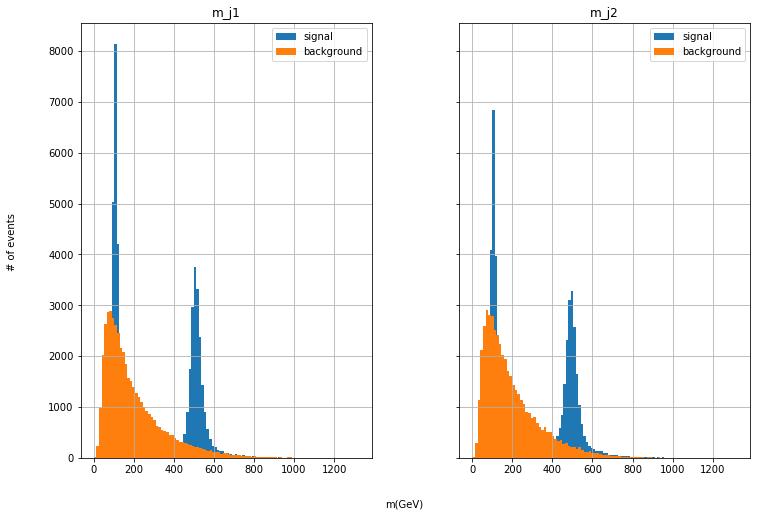

In [9]:
# set up figure & axes
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=[12,8])

# drop sharex, sharey, layout & add ax=axes
analysis[analysis.signal == 1].hist(column='m_j1',bins=100, ax=axes[0],label='signal')
analysis[analysis.signal == 0].hist(column='m_j1',bins=100, ax=axes[0],label='background')
analysis[analysis.signal == 1].hist(column='m_j2',bins=100, ax=axes[1],label='signal')
analysis[analysis.signal == 0].hist(column='m_j2',bins=100, ax=axes[1],label='background')
# set title and axis labels
#plt.suptitle('Your Title Here', x=0.5, y=1.05, ha='center', fontsize='xx-large')
fig.text(0.5, 0.04, 'm(GeV)', ha='center')
fig.text(0.04, 0.5, '# of events', va='center', rotation='vertical')
axes[0].legend()
axes[1].legend();

In [10]:
X = analysis.drop(['signal'], axis=1)
y = analysis['signal']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

Best individual is: {'n_estimators': 700, 'learning_rate': 0.1, 'algorithm': 'SAMME.R', 'base_estimator__max_depth': 3, 'base_estimator__criterion': 'entropy', 'base_estimator__splitter': 'random'} with fitness: 0.9538591277809011 Results Accuracy: 95.3859%

In [11]:
bdt_SAME_R = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=3, min_samples_leaf=1,random_state=42, splitter='random', criterion='entropy'),
    n_estimators=700, learning_rate=0.1, random_state=42, algorithm='SAMME.R')

In [12]:
bdt_SAME_R.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

In [ ]:
import pickle

In [ ]:
#pickle.dump(bdt_SAME_R, open('bdt_SAME_R.sav', 'wb'))

In [13]:
from sklearn.metrics import precision_score, precision_recall_curve, average_precision_score,\
accuracy_score,roc_curve, auc, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from itertools import cycle
from scipy import interp
import matplotlib.colors as mcolors
from sklearn.preprocessing import OneHotEncoder

In [14]:
bdt_SAME_R.classes_

array([0, 1])

In [15]:
enc = OneHotEncoder(handle_unknown='ignore')

In [16]:
y_val = label_binarize(y_test, classes=[0,1])

In [17]:
y_val = enc.fit_transform(y_val).toarray()

In [18]:
y_val

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [19]:
y_pred = bdt_SAME_R.predict(X_test)

In [20]:
y_pred = label_binarize(y_pred, classes=[0,1])
y_pred = enc.fit_transform(y_pred).toarray()

In [21]:
y_pred

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [22]:
bdt_SAME_R.predict(X_test)

array([1, 0, 1, ..., 1, 1, 0])

In [23]:
y_score = bdt_SAME_R.decision_function(X_test)

In [24]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(bdt_SAME_R.n_classes_):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

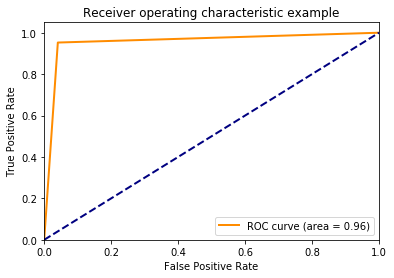

In [25]:
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.savefig('ROC_BDT.pdf')
plt.show()

In [ ]:
# Plot the two-class decision scores
plot_colors = "br"
plot_step = 0.02
class_names = ['background','signal']
twoclass_output = bdt_SAME_R.decision_function(X_test)
plot_range = (twoclass_output.min(), twoclass_output.max())
plt.subplot(111)
for i, n, c in zip(range(2), class_names, plot_colors):
    plt.hist(twoclass_output[y_test == i],
             bins=10,
             range=plot_range,
             facecolor=c,
             label='Class %s' % n,
             alpha=.5,
             edgecolor='k')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y1, y2 * 1.2))
plt.legend(loc='upper right')
plt.ylabel('Samples')
plt.xlabel('Score')
plt.title('Decision Scores')

plt.tight_layout()
plt.show()

In [ ]:
analysis.keys()

In [ ]:
col = ['pt_j1', 'm_j1', 'eta_j1', 'phi_j1', 'E_j1', 'pt_j2', 'm_j2', 'eta_j2',
       'phi_j2', 'E_j2', 'deltaeta', 'deltaphi', 'mEratio1', 'mEratio2',
       'm_jj', 'pt_asym', 'deltaR1_sj12', 'deltaR1_sj13', 'deltaR1_sj14',
       'deltaR1_sj23', 'deltaR1_sj24', 'deltaR1_sj34', 'deltaR2_sj12',
       'deltaR2_sj13', 'deltaR2_sj14', 'deltaR2_sj23', 'deltaR2_sj24',
       'deltaR2_sj34', 'n_subjets1', 'n_subjets2', 'P_BG', 'P_SIG']

In [ ]:
features_import = bdt_SAME_R.feature_importances_

In [ ]:
fig, ax = plt.subplots(figsize=(12,8)) 
width = 0.8 # the width of the bars 
ind = np.arange(len(features_import)) # the x locations for the groups
ax.barh(ind, features_import, width, color='red',alpha=0.8)
ax.set_yticks(ind+width/10)
ax.set_yticklabels(col, minor=False, fontsize=14)
ax.set_title('Feature importance in Decsion Tree Classifier with AdaBoost', fontsize=18)
ax.set_xlabel("Relative importance", fontsize=18)
ax.set_ylabel("feature", fontsize=18) 
ax.legend(bbox_to_anchor=(1.04,1), loc="upper left", prop={'size': 16})
#plt.savefig('./significance plots/feature_importance.png', bbox_inches='tight')

In [ ]:
from sklearn.tree import export_graphviz

In [ ]:
export_graphviz(bdt_SAME_R.estimators_[-1],out_file='tree_last_SAMME.dot',
                    feature_names=col,
                    filled=True,
                    rounded=True,
                    class_names=['background', 'signal']
                   )